# Курсовая работа

## Выполнил студент группы БФИ2202 Плешаков А.С

### Задание

Написать программу, которая будет считывать данные из CSV файла, содержащего информацию о продажах товаров в магазине.  
Данные в файле содержатся в следующем формате:  
| Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена за единицу | Общая стоимость |

Также необзодимо выполнить следующие пункты:  
1. Рассчитать общую выручку магазина.
2. Найти товар, который был продан наибольшее количество раз.
3. Найти товар, который принес наибольшую выручку.
4. Составить отчет, содержащий информацию об общей выручке магазина, количестве проданных единиц каждого товар и доле каждого товара в общей выручке.
Для решения задач необходимо использовать структуры данных, такие как массивы и хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск.
Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в соответствии с требованиями.

### Ниже представлен код програмы

In [195]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

### Хэш таблица, которая поддерживает метод цепочек

In [196]:
class chain_hash_table:
    def __init__(self, size: int):
        self.size = size
        self.table = [None] * size
    
    def hash_function(self, key):
        if key % self.size != key:
            raise KeyError("Элемент не найден")
        else:
            return key
    
    def insert(self, key, value):
        index = self.hash_function(key)
        if self.table[index] is None:
            self.table[index] = [(key, value)]
        else:
            self.table[index].append((key, value))
    
    def search(self, key):
        index = self.hash_function(key)
        if self.table[index] is not None:
            items = []
            for item in self.table[index]:
                items.append(item[1])
            return items
        return None  
    
    def delete(self, key):
        index = self.hash_function(key)
        if self.table[index] is not None:
            for i, item in enumerate(self.table[index]):
                if item[0] == key:
                    del self.table[index][i]
                    return
        raise KeyError("Элемент не найден")


### Хэш таблица, использующая простое хэширование

In [197]:
class hash_tablle:
    def __init__(self, initial_capacity=10):
        self.capacity = initial_capacity
        self.size = 0
        self.table = [None] * self.capacity
    
    def hash_function(self, key):
        return key % self.capacity
    
    def insert(self, key, value):
        index = self.hash_function(key)
        
        if self.table[index] is None:
            self.table[index] = (key, value)
            self.size += 1
        else:
            self.resize_and_rehash()
            self.insert(key, value)
    
    def resize_and_rehash(self):
        self.capacity *= 2
        new_table = [None] * self.capacity
        
        for item in self.table:
            if item is not None:
                key, value = item
                index = key % self.capacity
                new_table[index] = (key, value)
        
        self.table = new_table
    
    def search(self, key):
        index = self.hash_function(key)
        if self.table[index] is not None and self.table[index][0] == key:
            return self.table[index][1]
        return None
    
    def delete(self, key):
        index = self.hash_function(key)
        if self.table[index] is not None and self.table[index][0] == key:
            self.table[index] = None
            self.size -= 1
        else:
            raise KeyError("Элемент не найден")

### Быстрая сортировка

In [198]:
def quick_sort(arr, index=None):
    if index == None:
        if len(arr) <= 1:
            return arr
        pivot = arr[len(arr) // 2] 
        left = [x for x in arr if x < pivot]
        middle = [x for x in arr if x == pivot]
        right = [x for x in arr if x > pivot]
        return quick_sort(left) + middle + quick_sort(right)
    else:
        if len(arr) <= 1:
            return arr
        pivot = arr[len(arr) // 2][index]
        left = [x for x in arr if x[index] < pivot]
        middle = [x for x in arr if x[index] == pivot]
        right = [x for x in arr if x[index] > pivot]
        return quick_sort(left, index=index) + middle + quick_sort(right, index=index)

### Методы создания и чтения даты из csv файла

In [212]:
def create_csv_file(data: list[list] = None, file_name='orders.csv'):
   if data == None:
      data = [
         ['Номер заказа', 'Дата заказа', 'Название товара', 'Категория товара', 'Количество продаж', 'Цена за единицу', 'Общая стоимость'],
         [1, '2024-05-15', 'Бутбольный мяч', 'Спорт', 10, 25.00, 250.00],
         [2, '2024-05-15', 'Воутбук', 'Электроника', 5, 1000.00, 5000.00],
         [3, '2024-05-16', 'Аотоаппарат', 'Электроника', 10, 300.00, 3000.00]
      ]

   with open(file_name, 'w', newline='', encoding='utf-8') as csvfile:
      csvwriter = csv.writer(csvfile)
      csvwriter.writerows(data)
   print(f'CSV файл {file_name} успешно создан.')

def read_data(file_name='orders.csv'):
   data = []
   with open(file_name, 'r', newline='', encoding='utf-8') as csvfile:
      csvreader = csv.reader(csvfile)

      next(csvreader)
    
      for row in csvreader:
         data.append(row)

   return data

def show_csv_table(file='orders.csv'):
   try:
      df = pd.read_csv(file)
      df.index = [''] * len(df['Номер заказа'])
      display(df)
   except:
      print("Проблемы с чтением фала")

create_csv_file()
show_csv_table()

CSV файл orders.csv успешно создан.


,Номер заказа,Дата заказа,Название товара,Категория товара,Количество продаж,Цена за единицу,Общая стоимость
,1,2024-05-15,Бутбольный мяч,Спорт,10,25.0,250.0
,2,2024-05-15,Воутбук,Электроника,5,1000.0,5000.0
,3,2024-05-16,Аотоаппарат,Электроника,10,300.0,3000.0


### Класс, содержащий методы работы с данными, полученными из csv файла

In [200]:
class data_service:
    def __init__(self, data: list[list]):
       self.data = data

    def calc_revenue(self) -> float:
       count = 0 
       for product in self.data:
          count += float(product[-1])
      
       return count
    
    def find_max_needed_product(self, index) -> float:
       max_selled = float(self.data[0][index])
       for product in self.data:
          max_selled = max(max_selled, float(product[index]))
          
       return max_selled
          

    def search_the_most_selled_product(self) -> list:
       max_selled = int(self.find_max_needed_product(4))
       dict = chain_hash_table(max_selled + 1)
       for product in self.data:
          max_selled = max(max_selled, int(product[4]))
          dict.insert(int(product[4]), product[2])

       return dict.search(max_selled)
    
    def search_the_most_revenue_product(self) -> list:
       max_incomest = self.find_max_needed_product(6)
       dict = chain_hash_table(int(max_incomest) + 1)
       for product in self.data:
          max_incomest = max(max_incomest, float(product[6]))
          dict.insert(int(float(product[6])), product[2])

       return dict.search(int(max_incomest))
    
    def calc_percent_of_revenue(self) -> list[str]:
       revenue = self.calc_revenue()
       percent_list = []
       for product in self.data:
          percent = (float(product[6]) / revenue) * 100
          percent_list.append(str(round(percent, 1)) + '%')
      
       return percent_list
    
    def calc_percent_of_revenue_int(self) -> list[int]:
       revenue = self.calc_revenue()
       percent_list = []
       for product in self.data:
          percent = (float(product[6]) / revenue) * 100
          percent_list.append(round(percent, 1))
      
       return percent_list

data = read_data()
cl = data_service(data)
print(cl.calc_percent_of_revenue())  




['3.0%', '60.6%', '36.4%']


### Создание отчета

In [217]:
class visualisator:
   
    @staticmethod
    def show_report(file: str):
        pd_data = pd.read_csv(file)
        csv_srvice = data_service(read_data(file_name=file))

        revenue = csv_srvice.calc_revenue()
        percents = csv_srvice.calc_percent_of_revenue() 

        product_name = pd_data['Название товара']
        sells_count = pd_data['Количество продаж']
        cost = pd_data['Общая стоимость']

        data = {
            'Название товара': product_name,
            'Количество продаж': sells_count,
            'Общая стоимость': cost,
            'Доля от общей прибыли': percents,
            'Общая прибыль': [f'{revenue}'] + [''] * (len(percents) - 1)
        }

        df = pd.DataFrame(data)
        df.index = [''] * len(percents)

        display(df)

    def show_histogram(file: str):
        pd_data = pd.read_csv(file)
        csv_srvice = data_service(read_data(file_name=file))

        percents = csv_srvice.calc_percent_of_revenue_int()
        names = pd_data['Название товара']
        index = np.arange(len(names))

        plt.title('Доли от общей прибыли')
        plt.bar(index, percents, label='Доля прибыли', color='skyblue')
        plt.xticks(index, names)
        plt.legend(loc=2)
        plt.ylim(0, 100)

        plt.show()

    def show_cercle_diagram(file: str):
        pd_data = pd.read_csv(file)
        csv_srvice = data_service(read_data(file_name=file))

        product_names = pd_data['Название товара']
        sizes = csv_srvice.calc_percent_of_revenue_int()

        plt.pie(sizes, labels=product_names, autopct='%1.1f%%', startangle=140)

        plt.axis('equal')

        plt.title('Доли от общей прибыли')

        plt.show()
    
    def show_table(data):
        df = pd.DataFrame(data)
        display(df)

### Вывод отчета

,Название товара,Количество продаж,Общая стоимость,Доля от общей прибыли,Общая прибыль
,Бутбольный мяч,10,250.0,3.0%,8250.0
,Воутбук,5,5000.0,60.6%,
,Аотоаппарат,10,3000.0,36.4%,


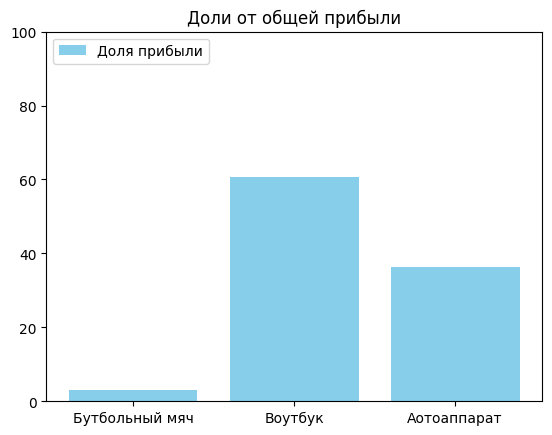

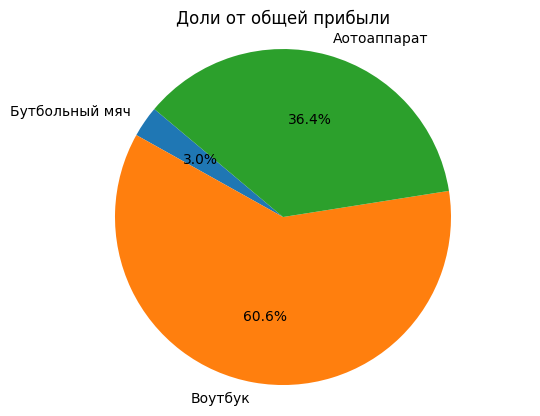

In [218]:
file_name = 'orders.csv'
visualisator.show_report(file_name)
visualisator.show_histogram(file_name)
visualisator.show_cercle_diagram(file_name)

### Вывод всех товаров в словарном порядке

In [213]:
csv_data = read_data('orders.csv')
array = quick_sort(csv_data, 2)
titles = (['Номер заказа', 'Дата заказа', 'Название товара', 'Категория товара', 'Количество продаж', 'Цена за единицу', 'Общая стоимость'])
array.insert(0, titles)

file = 'sorted_oraders'
create_csv_file(data=array, file_name=file)
show_csv_table(file=file)



CSV файл sorted_oraders успешно создан.


,Номер заказа,Дата заказа,Название товара,Категория товара,Количество продаж,Цена за единицу,Общая стоимость
,3,2024-05-16,Аотоаппарат,Электроника,10,300.0,3000.0
,1,2024-05-15,Бутбольный мяч,Спорт,10,25.0,250.0
,2,2024-05-15,Воутбук,Электроника,5,1000.0,5000.0
